In [33]:
import os
import io
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from scipy.stats import norm
from sklearn import preprocessing
from random import random
import math
from sklearn import datasets, linear_model

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline


reglin2=pd.read_csv("/Users/valeriaperezcong/Desktop/ITAM/9/aprendizaje/udemy/DataScience-Python3/regularization/regLinPoli2.csv")


In [34]:
reglin2.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X30,X31,X32,X33,X34,X35,X36,X37,X38,y
count,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.00000,1029.000000,1029.000000,1029.000000,...,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1.029000e+03
mean,-12.492680,327718.372035,2.565422,-0.018122,1.235180,-153.782162,-23648.95337,-2.565422,0.018122,-4.108330,...,5.612245,100.650146,-29.719145,-136.164237,-101.649174,-34.310010,-7.965986,-37.117590,2.499514,-8.035132e+18
std,572.608894,298395.344783,0.424105,0.715733,58.709228,0.000000,0.00000,0.424105,0.715733,584.648570,...,239.009325,2862.331915,4489.803784,2641.944700,5153.481524,2569.220416,2933.878621,1504.903744,102.994972,2.593868e+20
min,-992.795572,1.098476,0.020395,-0.999991,-100.000000,-153.782162,-23648.95337,-2.999260,-0.999992,-996.652132,...,-410.000000,-4857.000000,-7715.000000,-4596.000000,-8898.000000,-4383.000000,-5133.000000,-2565.000000,-175.000000,-9.506460e+20
25%,-499.000060,59791.243170,2.388319,-0.760277,-51.000000,-153.782162,-23648.95337,-2.869121,-0.714801,-511.919891,...,-189.000000,-2457.000000,-4063.000000,-2438.000000,-4780.000000,-2311.000000,-2520.000000,-1411.000000,-85.000000,-7.703790e+18
50%,-27.174576,241226.533900,2.691213,-0.029038,3.000000,-153.782162,-23648.95337,-2.691213,0.029038,-6.507760,...,7.000000,123.000000,129.000000,-196.000000,-13.000000,20.000000,-35.000000,78.000000,6.000000,-1.094503e+10
75%,477.216100,547320.664300,2.869121,0.714801,52.000000,-153.782162,-23648.95337,-2.388319,0.760277,516.046297,...,214.000000,2654.000000,3890.000000,2138.000000,4195.000000,2165.000000,2521.000000,1227.000000,94.000000,5.636450e+18
max,998.297367,996597.632200,2.999260,0.999992,100.000000,-153.782162,-23648.95337,-0.020395,0.999991,1000.933758,...,410.000000,4862.000000,7752.000000,4577.000000,8866.000000,4384.000000,5123.000000,2568.000000,175.000000,9.881420e+20


In [35]:
#regresión lineal iterativa regularizada
#estandarizar usando el standardScaler
#compare el error y pesos resultantes para lambda=0 y lambda=0.001
#comparar w con pesos grandes y chicos 

## Separamos el set y normalizamos los datos

In [36]:
#Separamos el set
#df[df.columns[0:-1]],df[[df.columns[-1]]], train_size=0.75
X_train, X_test, y_train, y_test=train_test_split(reglin2[reglin2.columns[0:-1]],reglin2[[reglin2.columns[-1]]], train_size=0.75)

#Convertimos en numpy array
X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)


In [37]:
#Normalizamos el set de X
scaler = preprocessing.StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

#Normalizamos el set de Y
#y_train, y_test
scaler_y = preprocessing.StandardScaler().fit(y_train)

y_train=scaler_y.transform(y_train)
y_test=scaler_y.transform(y_test)

## Proceso para regresión lineal iterativa

In [38]:
#osea para una specific row y un arreglo de coef
#recorres el renglón y haces una predicción para cada xi según b0 y b1
def predict (row, coeficientes):
    y_pred=coeficientes[0] #y_pred=b0
    for i in range (len(row)-1): #range ==(0,1) porque len(row)=2
        y_pred= y_pred + coeficientes[i+1]*row[i]#row[i] es mi xi
        #y_pred=b0 + b1*x1        
    return y_pred

#juntamos la x y la y en un solo set de entrenamiento 
dataset=np.concatenate((X_train,y_train), axis=1)

#coeficientes=[1,1]
coeficientes=np.ones((len(X_train[0]))+1 )## coef==[1,1]
for row in dataset: #para cada renglon del set
    y_pred=predict(row,coeficientes)
    y_real=row[1] ## ie el segundo lugar de tu row (tu y) x|y
    error=y_real-y_pred
    #print("Expected=%.3f, Predicted=%.3f" % (y_real, y_pred))
    #print("Error=%.3f" % (error))
    #print(row)
    #print("x=%.3f, y=%.3f" % (row[0],row[1]))

#tenemos que hacer una función que actualize los coeficientes para cada renglón del training data
#para lograrlo tenemos que calcular el error entre el valor real de y, y el
#valor predicho

#error = predicción - valor_real
#b1(t) = b1(t-1) + learning_rate * error(t-1) * x1(t-1)
#b0(t) = b0(t-1) - learning_rate * error(t-1) #vemos que no hay x en b0

def calcular_coeficientes (data,learning_rate):
    #coeficientes=[1,1]
    coeficientes=np.ones((len(X_train[0]))+1 )## coef==[1,1]
    sum_error=0
    b1=[]
    errores=[]
    for row in data:
        y_pred=predict(row,coeficientes)
        y_real=row[1]
        error=y_real-y_pred
        sum_error=sum_error + error**2## suma del error al cuadrado
        coeficientes[0]=coeficientes[0]+learning_rate*error #i.e b0= b0+learning_rate*error
        
        for i in range(len(row)-1):
            coeficientes[i+1]=coeficientes[i+1]+learning_rate*error*row[i] #i.e b1=b1+lr*error*x
    return coeficientes
            

## Agregamos regularización

In [39]:
def regularizacion (data,learning_rate, lam):
    #coeficientes=[1,1,...] son 39 en total pues tengo b0 y b1 para los demas
    coeficientes=np.ones((len(X_train[0]))+1 )
    sum_error=0
 
    for row in data:
        coeficientes=coeficientes
        y_pred=predict(row,coeficientes)
        y_real=row[1]
        error=y_real-y_pred        
        sum_error=sum_error + error**2
        #b0
        coeficientes[0]=coeficientes[0]+learning_rate*error #i.e b0= b0+learning_rate*error
        
        for i in range(len(row)-1):
            #i.e b1=b1+lr*error*x-lambda*x
            coeficientes[i+1]=coeficientes[i+1]+learning_rate*error*row[i]+lam*row[i]
    return coeficientes, sum_error
            

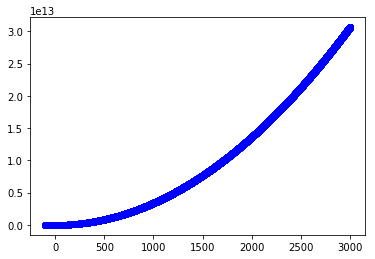

In [51]:
#numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)
lam=np.linspace(-100,3000,15000)
suma_error=[]
for l in lam:
    error=regularizacion(dataset,0.01,l)[1]
    suma_error.append(error)
#graficamos
plt.plot(lam, suma_error, 'bo')
plt.show()